<a href="https://colab.research.google.com/github/binayak13swain/MCA-activitys-assingment-/blob/main/airline__passanger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/airline-passengers.csv')

In [14]:
scaler = MinMaxScaler()
df['Passengers'] = scaler.fit_transform(df[['Passengers']])
print(df.head())

     Month  Passengers
0  1949-01    0.015444
1  1949-02    0.027027
2  1949-03    0.054054
3  1949-04    0.048263
4  1949-05    0.032819


In [18]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 12
X, y = create_sequences(df['Passengers'].values, seq_length)

In [27]:
split_ratio = 0.8
split_index = int(split_ratio * len(X))
split_index = max(1, int(split_ratio * len(X)))

X_train = X[:split_index]
X_val = X[split_index:]
y_train = y[:split_index]
y_val = y[split_index:]
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")

Training data shape: (104, 12), (104,)
Validation data shape: (27, 12), (27,)


build LSTM


In [23]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [28]:
model.summary()
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val))




Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,885 (198.77 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,924 (132.52 KB)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.1166 - val_loss: 0.3776
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0880 - val_loss: 0.2856
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0624 - val_loss: 0.1982
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0405 - val_loss: 0.1176
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0215 - val_loss: 0.0523
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - val_loss: 0.0208
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0146 - val_loss: 0.0239
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0167 - val_loss: 0.0197
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - val_loss: 0.0252
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0084 - val_loss: 0.0345


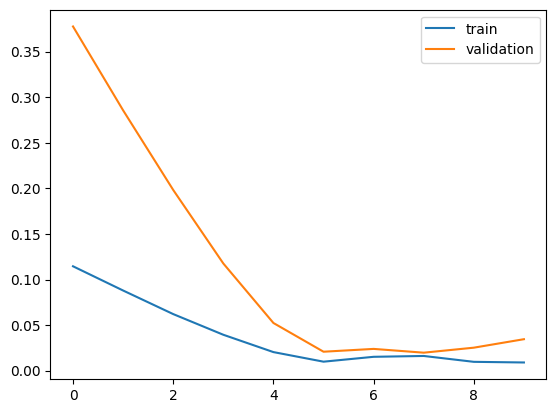

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

evalution model


In [30]:
loss = model.evaluate(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val, )
print(f"Validation Loss: {loss}")

Validation Loss: 0.03450703248381615


In [31]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_val.reshape(X_val.shape[0], X_val.shape[1], 1))
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Validation RMSE: 0.18576068375692828


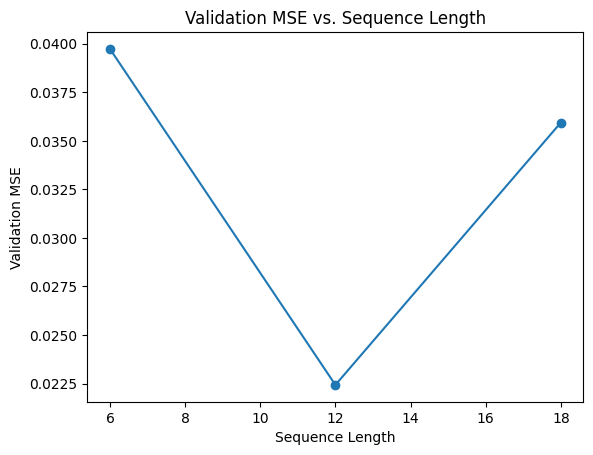

In [36]:
sequence_lengths = [6, 12, 18]
mse_values = []

for seq_length in sequence_lengths:
    X, y = create_sequences(df['Passengers'].values, seq_length)
    split_ratio = 0.8
    split_index = int(split_ratio * len(X))
    split_index = max(1, int(split_ratio * len(X)))

    X_train = X[:split_index]
    X_val = X[split_index:]
    y_train = y[:split_index]
    y_val = y[split_index:]

    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val), verbose=0)

    loss = model.evaluate(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val, verbose=0)
    mse_values.append(loss)

plt.plot(sequence_lengths, mse_values, marker='o')
plt.xlabel("Sequence Length")
plt.ylabel("Validation MSE")
plt.title("Validation MSE vs. Sequence Length")
plt.show()